<a href="https://colab.research.google.com/github/hussain0048/Water-borne-diseases/blob/main/Watern_Brone_Disease_2_21_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1- Introduction**
 the water-borne diseases are the most common which transmitted in contaminated fresh water, whether in bathing, washing, drinking, or in the preparation of food.. More than one-third of Earth&#39;s accessible renewable freshwater is consumptively used for agricultural, industrial, and
domestic purposes. Water-borne diseases are commonly found throughout the world but the
condition is more aggravated in developing countries including Pakistan. 

#**2-Importing libraries**

In [65]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 


#**3-Processing**


## **3.1 Data Reading**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [37]:
Train_data

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,NaN,1.310163e+12,NaN,34 Year(s),Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,K04HEM20123774,Negative
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,K04HEM18160758,Negative
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,K04HEM18160758,Negative
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,NaN,4.220136e+12,NaN,28 Year(s),Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,K04HEM17056995,Negative
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,NaN,1.310109e+12,NaN,42 Year(s),Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,K04HEM17073233,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,22912,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,NaN,8.139494e+10,NaN,13 Year(s),Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,K04HEM21017730,Negative
22912,22913,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,NaN,NaN,NaN,20 Year(s),Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,K04HEM21018207,Negative
22913,22914,K04HEM21019179,K0400002461645,M Umer,M JUNAID,NaN,NaN,NaN,21 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,K04HEM21019179,Negative
22914,22915,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,NaN,M SALEEM,NaN,NaN,45 Year(s),Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,K04HEM21021055,Negative


## 3.2- **Drop Index Colum**

In [38]:
Train_data=Train_data.reset_index()
Train_data1=Train_data.drop(columns=['index'])

In [39]:
Train_data1

,Unnamed: 0,SECTION_NO,MRNO,PATIENT_NAME,FATHER_NAME,HUSBAND_NAME,NIC_NEW,REFERRED_FROM,AGE,GENDER,NO_OF_ADMISSION,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,SECTION_NO.1,RESULT_TEXT
0,1,K04HEM20123774,K0460000001363,Saqib Mehmood Khan,MUHAMMAD AFSAR KHAN,NaN,1.310163e+12,NaN,34 Year(s),Male,0,Abbottabad,havelia,11/12/2020 10:46:53 A11P11,1000000000085007,Y,1000000000087207,K04HEM20123774,Negative
1,2,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:21 A9P9,1000000000087207,Y,1000000000087207,K04HEM18160758,Negative
2,3,K04HEM18160758,K0460000001680,Muhammad Iqbal,ABDUR REHMAN,NaN,1.310134e+12,NaN,43 Year(s),Male,0,Abbottabad,Abbottabad,9/29/2018 9:26:07 A9P9,1000000000085007,Y,1000000000087207,K04HEM18160758,Negative
3,4,K04HEM17056995,K0460000000106,Shahbaz Ahmad,MUMTAZ AHMAD,NaN,4.220136e+12,NaN,28 Year(s),Male,0,Abbottabad,Abbottabad,5/4/2017 9:48:37 A5P5,1000000000085007,Y,1000000000087207,K04HEM17056995,Negative
4,5,K04HEM17073233,K0460000000150,Mehfooz Ahmad,HAIDER ZAMAN,NaN,1.310109e+12,NaN,42 Year(s),Male,0,Abbottabad,Abbottabad,6/3/2017 11:59:38 A6P6,1000000000085007,Y,1000000000087207,K04HEM17073233,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22911,22912,K04HEM21017730,K0400002457330,Rooh Ul Ameen,ABDUL SALAM,NaN,8.139494e+10,NaN,13 Year(s),Male,1,Haripur,Haripur,2/10/2021 16:53:12 A2P2,1000000000085060,Y,1000000000087207,K04HEM21017730,Negative
22912,22913,K04HEM21018207,K0400002459565,Zeshan Rustam,M RUSTAM,NaN,NaN,NaN,20 Year(s),Male,0,Abbottabad,Abbottabad,2/11/2021 11:49:58 A2P2,1000000000085007,Y,1000000000087207,K04HEM21018207,Negative
22913,22914,K04HEM21019179,K0400002461645,M Umer,M JUNAID,NaN,NaN,NaN,21 Year(s),Male,0,Abbottabad,Abbottabad,2/13/2021 11:55:21 A2P2,1000000000087207,Y,1000000000087207,K04HEM21019179,Negative
22914,22915,K04HEM21021055,K04ACE21027742,Shaheen Akhtar,NaN,M SALEEM,NaN,NaN,45 Year(s),Female,0,Abbottabad,Abbottabad,2/17/2021 11:09:47 A2P2,1000000000087207,Y,1000000000087207,K04HEM21021055,Negative


##**3.3- Drop input features**

In [40]:
New5=Train_data1.drop(Train_data1.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

In [ ]:
Train_data1

In [42]:
Train_data1.columns

Index(['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'CPT_ID', 'RESULT_VALUE', 'CPT_ID.1', 'RESULT_TEXT'],
      dtype='object')

##**3.4 Convert target variable into binary Form**

In [43]:
Train_data1['RESULT_TEXT'].replace({'Negative': 0, 'Postive': 1},inplace = True)


##**3.5 Imbalance problem**

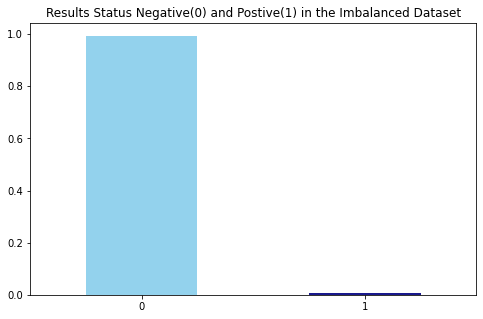

In [45]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data1.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Postive(1) in the Imbalanced Dataset')
plt.show()

In [ ]:
from sklearn.utils import resample
no = Train_data1[Train_data1.RESULT_TEXT == 0]
yes = Train_data1[Train_data1.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

##**3.6 Check Missing Value**

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

##**3.7 Hot Encoding**

In [48]:
oversampled.select_dtypes(include=['object']).columns

Index(['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'RESULT_VALUE'],
      dtype='object')

In [50]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [ ]:
oversampled

In [ ]:
oversampled

In [52]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [ ]:
oversampled

In [54]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

##**3.8 Outlier detection**

In [ ]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

In [ ]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

In [ ]:
MiceImputed

##**3.9 Corelation Detection**

In [ ]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

##**3.10 Feature Scaling**

In [59]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [63]:
modified_data

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
1,0.893454,0.482353,0.5,0.0,0.0,0.947134,1.000000,0.0,0.0,0.0
2,0.893454,0.482353,0.5,0.0,0.0,0.947090,0.481995,0.0,0.0,0.0
3,0.888200,0.270588,0.5,0.0,0.0,0.476987,0.481995,0.0,0.0,0.0
4,0.888286,0.470588,0.5,0.0,0.0,0.552535,0.481995,0.0,0.0,0.0
5,0.888458,0.305882,0.0,0.0,0.0,0.091037,0.481995,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
12343,0.258484,0.764706,0.0,0.0,0.0,0.161908,0.481995,0.0,0.0,1.0
15056,0.218002,0.341176,0.0,0.0,0.0,0.862010,1.000000,0.0,0.0,1.0
13513,0.627562,0.988235,0.5,0.0,0.0,0.372402,0.633636,0.0,0.0,1.0
8974,0.064083,0.105882,0.5,0.0,0.0,0.468029,1.000000,0.0,0.0,1.0


#**4 New Feature Selection**

In [ ]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RESULT_TEXT']
y = modified_data[['RESULT_TEXT']]
selector = SelectKBest(chi2, k=50)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

In [ ]:
X_aug =  modified_data[[ 'Termination_Status','employee_id', 'region', 'region_reporting', 'location',
       'location_country', 'location_tier', 'location_cost',
       'location_reporting', 'locations_wf', 'restated_LOB', 'tenure', 'age',
       'generation', 'job_family', 'job_family_group', 'gender',
       'management_chain_level_employee', 'Job_level', 'ccq', 'Stock_Eligible',
       'total_bonus_amount_USD', 'total_base_pay_amount_usd',
       'compensation_usd', 'competitive_range_low_base_salary',
       'market_reference_point_base_salary',
       'competitive_range_high_base_salary',
       'competitive_range_low_total_target_cash',
       'market_reference_point_total_target_cash',
       'competitive_range_high_total_target_cash',
       'competitive_base_pay_market_position',
       'competitive_total_target_cash_market_position', 'Time_in_Job_Profile',
       'Employee_Management_Level', 'bonus_eligible',
       'promotion_count_rolling_2_years',
       'change_job_type_count_rolling_2_years',
       'time_since_last_transfer_in_years',
       'time_since_last_change_job_type_in_years',
       'current_vs_average_compensation_job_level',
       'current_vs_average_tenure_job_level', 'current_vs_average_tenure',
       '%_Abover_or_Below_Average_Compensation_job_level',
       '%_Abover_or_Below_Average_Tenure_job_level',
       '%_Abover_or_Below_Average_Tenure_Company', 'eNPS',
       'Time_to_retirement_in_years',
       'Mgt_Level_one_level_up_change_rolling_12_months',
       'Mgt_Level_two_level_up_change_rolling_12_months',
       'time_with_current_manager_in_years',
       'time_since_compensation_change_in_years']]

In [ ]:
X_aug

,Termination_Status,employee_id,region,region_reporting,location,location_country,location_tier,location_cost,location_reporting,locations_wf,restated_LOB,tenure,age,generation,job_family,job_family_group,gender,management_chain_level_employee,Job_level,ccq,Stock_Eligible,total_bonus_amount_USD,total_base_pay_amount_usd,compensation_usd,competitive_range_low_base_salary,market_reference_point_base_salary,competitive_range_high_base_salary,competitive_range_low_total_target_cash,market_reference_point_total_target_cash,competitive_range_high_total_target_cash,competitive_base_pay_market_position,competitive_total_target_cash_market_position,Time_in_Job_Profile,Employee_Management_Level,bonus_eligible,promotion_count_rolling_2_years,change_job_type_count_rolling_2_years,time_since_last_transfer_in_years,time_since_last_change_job_type_in_years,current_vs_average_compensation_job_level,current_vs_average_tenure_job_level,current_vs_average_tenure,%_Abover_or_Below_Average_Compensation_job_level,%_Abover_or_Below_Average_Tenure_job_level,%_Abover_or_Below_Average_Tenure_Company,eNPS,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,time_since_compensation_change_in_years
14,0.0,0.756853,0.0,1.000000,0.011905,0.380952,0.5,1.0,0.235294,0.2,0.000000,0.361484,0.116279,1.000000,0.817757,0.142857,0.5,0.666667,0.2,0.875000,1.0,0.000000,0.077358,0.064118,0.061056,0.061056,0.061056,0.041077,0.041077,0.041077,0.0,0.0,0.362238,0.666667,0.0,0.5,0.5,0.422899,0.056561,0.0,0.0,0.0,0.873831,0.816363,0.361469,0.318158,0.851064,1.0,1.0,0.101796,0.203593
17,0.0,0.990830,0.5,0.333333,0.327381,1.000000,0.5,0.0,0.647059,0.8,0.000000,0.006314,0.279070,1.000000,0.074766,0.142857,0.5,0.333333,0.6,0.769008,0.0,0.382979,0.758356,0.694109,0.728035,0.728036,0.728036,0.678260,0.678259,0.678258,0.2,0.2,0.039161,0.333333,1.0,0.0,0.0,0.007387,0.018100,0.0,1.0,1.0,0.961947,0.012737,0.006311,0.384985,0.744681,0.0,0.0,0.047904,0.047904
30,0.0,0.873556,0.5,0.333333,0.130952,1.000000,0.5,0.0,0.529412,0.6,0.000000,0.171271,0.069767,0.666667,0.817757,0.142857,0.5,0.333333,0.0,0.250000,1.0,0.000000,0.436052,0.361421,0.366203,0.366201,0.366200,0.306968,0.306969,0.306970,0.2,0.2,0.489510,0.333333,0.0,0.0,0.0,0.200369,0.490950,0.0,0.0,1.0,0.711631,0.718528,0.171285,0.543464,0.936170,0.0,0.0,0.598802,0.203593
37,0.0,0.787906,0.0,0.000000,0.261905,0.142857,1.0,1.0,0.588235,0.7,0.000000,0.329124,0.209302,1.000000,0.817757,0.142857,0.5,0.666667,0.2,0.625000,1.0,0.000000,0.082795,0.068624,0.103469,0.103468,0.103468,0.075823,0.075823,0.075823,1.0,1.0,0.830070,0.666667,0.0,0.0,0.5,0.385042,0.092760,1.0,0.0,1.0,0.412389,0.575643,0.329115,0.360459,0.702128,1.0,1.0,0.203593,0.203593
44,0.0,0.865155,0.0,0.000000,0.261905,0.142857,1.0,1.0,0.588235,0.7,0.000000,0.203631,0.418605,1.000000,0.817757,0.142857,0.0,0.333333,0.4,0.625000,1.0,0.000000,0.158059,0.131007,0.126888,0.126888,0.126888,0.121016,0.121016,0.121016,0.0,0.2,0.489510,0.333333,0.0,0.0,0.5,0.238227,0.266968,0.0,1.0,1.0,0.601138,0.265961,0.203639,0.750019,0.351064,0.0,0.0,0.700599,0.203593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6158,1.0,0.861809,0.5,0.333333,0.130952,1.000000,0.5,0.0,0.529412,0.6,0.142857,0.138122,0.581395,0.333333,0.140187,0.190476,0.0,0.333333,0.2,0.289895,1.0,0.000000,0.203982,0.169070,0.192931,0.192928,0.192927,0.155562,0.155562,0.155562,0.2,0.2,0.489510,0.333333,0.0,0.0,0.0,0.161588,0.395928,1.0,1.0,1.0,0.210493,0.217199,0.138130,0.249981,0.468085,0.0,0.0,1.000000,0.802395
71,1.0,0.900694,0.0,0.000000,0.988095,0.738095,1.0,0.0,0.941176,0.0,0.285714,0.065509,0.279070,1.000000,0.242991,0.000000,0.0,0.333333,0.4,0.431909,1.0,0.000000,0.338667,0.280703,0.280460,0.280459,0.280459,0.220819,0.220819,0.220819,0.0,0.0,0.489510,0.333333,0.0,

#**4 Data spliting**

In [67]:
X=modified_data.drop('RESULT_TEXT',axis=1)

In [68]:
y=modified_data[['RESULT_TEXT']]

In [ ]:
# y
X

In [ ]:
y

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# **5- Model Training**

##**5.1-Decision Trees**

In [72]:
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred1 = DTC.predict(X_test)
dt=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

### **5.1.1 -Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.1.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

### **5.1.3-ROC CURVE**

In [ ]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.2-Random Forest**

In [77]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=11, verbose=0,
                       warm_start=False)

In [78]:
y_pred1 = Ran_For.predict(X_test)
rn=Ran_For.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_test, y_test)))

Accuracy score= 0.7750


### **5.2.1-Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.2.2  Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

### **5.2.3 ROC CURVE**

In [ ]:
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.3 SVM Support Vector Machine**

In [ ]:
svc=LinearSVC(random_state=0, tol=1e-5)
svc= svc.fit(X_train , y_train)
svc

In [ ]:
y_pred1 = svc.predict(X_test)
sv=svc.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(svc.score(X_test, y_test)))

### **5.3.1- Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.3.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

### **5.3.3-ROC CURVE**

In [ ]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.4-Logistic Regression**

In [87]:
LR= LogisticRegression()
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred1 = LR.predict(X_test)
lr=LR.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR.score(X_test, y_test)))

### **5.4.1-Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.4.2 Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

### **5.4.3-ROC CURVE**

In [ ]:
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

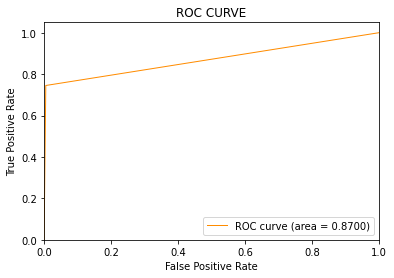

In [ ]:
#  ROC fro sep data
fpr41, tpr41, thresholds = roc_curve(y_sep, y_pred5)
roc_auc = auc(fpr41, tpr41)
plt.figure()
plt.plot(fpr41, tpr41, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

## **5.5-KNN Algorithm**

In [92]:
from sklearn.naive_bayes import GaussianNB
KNN=GaussianNB()
KNN= KNN.fit(X_train , y_train)
KNN

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred1 = KNN.predict(X_test)
kn=KNN.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN.score(X_test, y_test)))

### **5.5.1-Confusion Matrix**

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

### **5.5.2-Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')

### **5.5.3-ROC CURVE**

In [ ]:
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr5, tpr5)
plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# **6-Compare Modle performance** 

## **6.1-ROC Curve for Models**

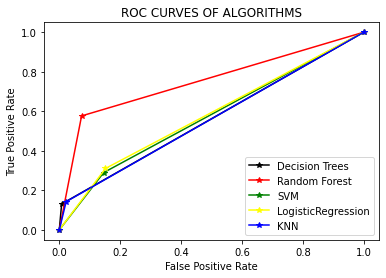

In [97]:
plt.plot(fpr1, tpr1, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr2, tpr2, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr3, tpr3, marker='*', label='SVM', color = 'green')
plt.plot(fpr4, tpr4, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr5, tpr5, marker='*', label='KNN', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **6.2-Comparison of all algorithms Results**

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt,4)])
x.add_row(["Random Forest Algorithm", round(rn,4)])
x.add_row(["Support Vector Machine Algorithm", round(sv,4)])
x.add_row(["LogisticRegression Algorithm", round(lr,4)])
x.add_row(["KNN Algorithm", round(kn,4)])
print(x)
print('\n')

In [ ]:
#  for sep data

x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt2,4)])
x.add_row(["Random Forest Algorithm", round(rn2,4)])
x.add_row(["Support Vector Machine Algorithm", round(sv2,4)])
x.add_row(["LogisticRegression Algorithm", round(lr2,4)])
x.add_row(["KNN Algorithm", round(kn2,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.923   |
|     Random Forest Algorithm      |  0.9506  |
| Support Vector Machine Algorithm |  0.9357  |
|   LogisticRegression Algorithm   |  0.9274  |
|          KNN Algorithm           |  0.8175  |
+----------------------------------+----------+




## **6.3-Best Model with Accuracy and Time of execution**

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Random Forest Algorithm", round(rn,4)])

print(x)
print('\n')

#**13- Train on all training data now to make it more good on more data**

## **13.1 Logistic Regression**

In [ ]:
Ran_For= LogisticRegression()
Ran_For= Ran_For.fit(X , y)
Ran_For

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **13.1.1 Selecting the Test data of 8997 rows**

In [ ]:
Testdata=normalized_data_with_selected_features.tail(8997)

In [ ]:
Testdata

### **13.1.2 As we are going to Predict the 'Termination_Status' so we dont need this**

In [ ]:
Testdata=Testdata.drop(columns=['Termination_Status'])
Testdata

### **13.1.3 Getting Probabilties on the Test data using Decision Trees Trained Model**

In [ ]:
predictions=Ran_For.predict_proba(Testdata)
predictions = np.amax(predictions, axis=1)
predictions

array([0.89484018, 0.99981501, 0.99123215, ..., 0.99817415, 0.99826815,
       0.99853741])

In [ ]:
Pred=pd.DataFrame()
Pred['Test data predictions probabilties']=predictions
Pred['Test data predictions probabilties']=round(Pred['Test data predictions probabilties'],2)
Pred['Test data predictions probabilties']

0       0.89
1       1.00
2       0.99
3       0.98
4       0.99
        ... 
8992    1.00
8993    1.00
8994    1.00
8995    1.00
8996    1.00
Name: Test data predictions probabilties, Length: 8997, dtype: float64

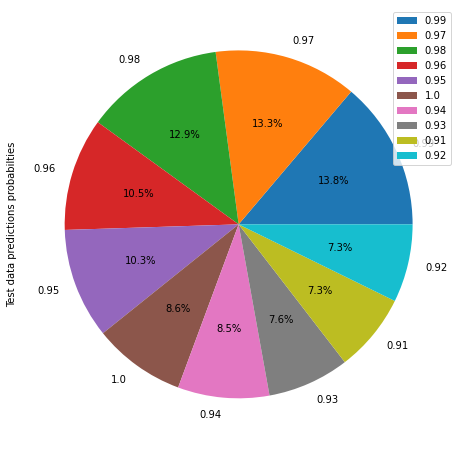

In [ ]:
Pred['Test data predictions probabilties'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


In [ ]:
Pred['Test data predictions probabilties'].value_counts()

0.99    835
0.97    805
0.98    780
0.96    635
0.95    620
1.00    519
0.94    514
0.93    460
0.91    441
0.92    439
0.90    411
0.89    332
0.88    326
0.87    274
0.86    256
0.85    209
0.84    169
0.83    158
0.82    121
0.81    106
0.80     85
0.79     67
0.78     58
0.77     44
0.76     43
0.75     25
0.69     23
0.74     22
0.73     22
0.66     19
0.70     18
0.71     16
0.72     16
0.59     14
0.67     13
0.58     10
0.51      9
0.54      9
0.62      9
0.65      9
0.55      8
0.61      7
0.52      7
0.63      7
0.68      6
0.64      5
0.60      5
0.57      4
0.56      3
0.50      3
0.53      1
Name: Test data predictions probabilties, dtype: int64

## **13.2-Getting Prediction on the Test data using Decision Trees Trained Model**

In [ ]:
predictions=DTC.predict(Testdata)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
Pred['Test data predictions']=predictions
Pred['Test data predictions']=Pred['Test data predictions'].replace(0,'Yes')
Pred['Test data predictions']=Pred['Test data predictions'].replace(1,'No')
Pred

,Test data predictions probabilties,Test data predictions
0,0.89,No
1,1.00,No
2,0.99,No
3,0.98,No
4,0.99,No
...,...,...
8992,1.00,No
8993,1.00,No
8994,1.00,No
8995,1.00,No


# **14-Percentage of Predictions that are going to terminate is 1% and percentage of predictions that are not going to terminate are 99%**

In [100]:
Pred['Test data predictions'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


NameError: ignored

In [ ]:
Pred['Test data predictions'].value_counts()

No     8907
Yes      90
Name: Test data predictions, dtype: int64

# **15-Saving the probabilties and predictions in the last column of test data as Predictions**

In [ ]:
Test_data['Test data predictions']=Pred['Test data predictions probabilties']
Test_data['Test data predictions']=Pred['Test data predictions']

In [ ]:
Test_data.to_csv('Headcount Test with Predictions probabilties Sep.csv')
print('Headcount Test with Predictions probabilties file saved')

Headcount Test with Predictions probabilties file saved
